In [1]:
import torch
from datasets import *
import visualizer
import models
import matplotlib.pyplot as plt

In [2]:
M_model_state_dict = torch.load('noise_models/spiral_M-DYR-H/0.0/best_epoch_1_valLoss_1.89367_valAcc_54.12500_noise_0_bestAccVal_54.12500.pth')
LRM_model_state_dict = torch.load('noise_models/spiral_LRM-DYR-H/0.0/best_epoch_1_valLoss_1.29694_valAcc_55.62500_noise_0_bestAccVal_55.62500.pth')


In [3]:
M_model = models.SpiralModel()
M_model.load_state_dict(M_model_state_dict)
LRM_model = models.SpiralModel()
LRM_model.load_state_dict(LRM_model_state_dict)

<All keys matched successfully>

In [4]:
trainset, _, _ = get_spiral_datasets()

/home/masonwang/latent-mixup-LNL-analysis/datasets.py:7: UserWarning: `x` isn't a recognized object; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  trainset = SpiralDataset(dir, train=True)
/home/masonwang/latent-mixup-LNL-analysis/datasets.py:8: UserWarning: `x` isn't a recognized object; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  trainset_track = SpiralDataset(dir, train=True)
/home/masonwang/latent-mixup-LNL-analysis/datasets.py:9: UserWarning: `x` isn't a recognized object; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  testset = SpiralDataset(dir, train=False)


In [5]:
train_loader = torch.utils.data.DataLoader(
    trainset, batch_size=len(trainset), shuffle=True, num_workers=1, pin_memory=True)


In [6]:
x_train, y_train = next(iter(train_loader))

/home/masonwang/anaconda3/envs/lnoise-analysis/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448234945/work/c10/cuda/CUDAFunctions.cpp:115.)
  return torch._C._cuda_getDeviceCount() > 0


In [7]:

xi = np.arange(-15, 15, 0.1)
xj = np.arange(-15, 15, 0.1)
x_sample = np.array([[j, i] for i in xi for j in xj])
y = M_model(torch.tensor(x_sample))

In [8]:
y.shape

torch.Size([90000, 2])

<ipython-input-9-a8db511781b9>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x, y, confidence)


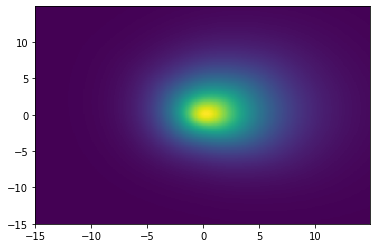

In [9]:
# get P(Y=1|X)
confidence = torch.transpose(torch.nn.functional.softmax(y, dim=1), 0, 1)[1].detach().numpy()
confidence = confidence.reshape((len(xi), len(xj)))
x, y = np.meshgrid(xi, xj)

plt.pcolormesh(x, y, confidence)


In [12]:

def get_dim(x, y, dim=0, label_class=0, subset=500):
    return x[y == label_class, dim][:subset]


y_train_class = visualizer.one_hot_to_index_vector(y_train)

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

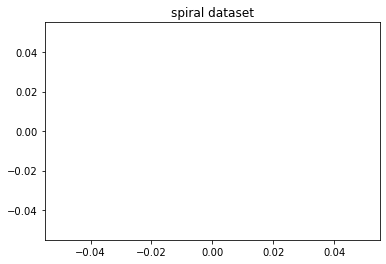

In [13]:

x_d0_l0 = get_dim(x_train, y_train_class, dim=0, label_class=0)
x_d1_l0 = get_dim(x_train, y_train_class, dim=1, label_class=0)
x_d0_l1 = get_dim(x_train, y_train_class, dim=0, label_class=1)
x_d1_l1 = get_dim(x_train, y_train_class, dim=1, label_class=1)

plt.title('spiral dataset')
plt.plot(x_d0_l0, x_d1_l0, '.', label='class 0')
plt.plot(x_d0_l1, x_d1_l1, '.', label='class 1')
plt.colorbar()
plt.show()